In [55]:
#install.packages("ggdark")

Installing package into 'D:/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ggdark' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\killua\AppData\Local\Temp\Rtmpo7OnhW\downloaded_packages


In [1]:
library(ggplot2) # powerful visualization library
library(dplyr) # powerful data wrangling library
library(ggdark)
library(ggExtra)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggdark' was built under R version 4.1.3"
Warning message:
"package 'ggExtra' was built under R version 4.1.3"


In [2]:
file = 'mtcars.csv'
carData = read.csv(file, header = TRUE, row.names = 1, stringsAsFactors = FALSE)
head(carData, 5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


In [8]:
modelA = lm(data = carData, mpg ~ hp)
modelB = lm(data = carData, mpg ~ hp + cyl)
modelC = lm(data = carData, mpg ~ hp + cyl + disp)
modelD = lm(data = carData, mpg ~ hp + cyl + disp + drat)
modelE = lm(data = carData, mpg ~ hp + cyl + disp + drat + wt)
modelF = lm(data = carData, mpg ~ hp + cyl + disp + drat + wt + qsec)
modelG = lm(data = carData, mpg ~ hp + cyl + disp + drat + wt + qsec + vs)
modelH = lm(data = carData, mpg ~ hp + cyl + disp + drat + wt + qsec + vs + am)
modelI = lm(data = carData, mpg ~ hp + cyl + disp + drat + wt + qsec + vs + am + gear)
modelJ = lm(data = carData, mpg ~ hp + cyl + disp + drat + wt + qsec + vs + am + gear + carb)


r1 =summary(modelA)$r.squared
r2 =summary(modelB)$r.squared
r3 =summary(modelC)$r.squared
r4 =summary(modelD)$r.squared
r5 =summary(modelE)$r.squared
r6 =summary(modelF)$r.squared
r7 =summary(modelG)$r.squared
r8 =summary(modelH)$r.squared
r9 =summary(modelI)$r.squared
r10 =summary(modelJ)$r.squared

ar1 =summary(modelA)$adj.r.squared
ar2 =summary(modelB)$adj.r.squared
ar3 =summary(modelC)$adj.r.squared
ar4 =summary(modelD)$adj.r.squared
ar5 =summary(modelE)$adj.r.squared
ar6 =summary(modelF)$adj.r.squared
ar7 =summary(modelG)$adj.r.squared
ar8 =summary(modelH)$adj.r.squared
ar9 =summary(modelI)$adj.r.squared
ar10 =summary(modelJ)$adj.r.squared

In [7]:
summary(modelA)


Call:
lm(formula = mpg ~ hp, data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


In [9]:
r2Score = c(r1,r2,r3,r4,r5,r6,r7,r8,r9,r10)
adjR2Score = c(ar1,ar2,ar3,ar4,ar5,ar6,ar7,ar8,ar9,ar10)
numberOfFeatures = seq.int(1,10)

df = data.frame(numberOfFeatures,r2Score,adjR2Score)
df

numberOfFeatures,r2Score,adjR2Score
<int>,<dbl>,<dbl>
1,0.6024373,0.5891853
2,0.7407084,0.7228263
3,0.7678877,0.7430186
4,0.7825119,0.7502914
5,0.8513152,0.8227219
6,0.8548224,0.8199798
7,0.8549377,0.8126278
8,0.8677917,0.8218062
9,0.8686546,0.8149224


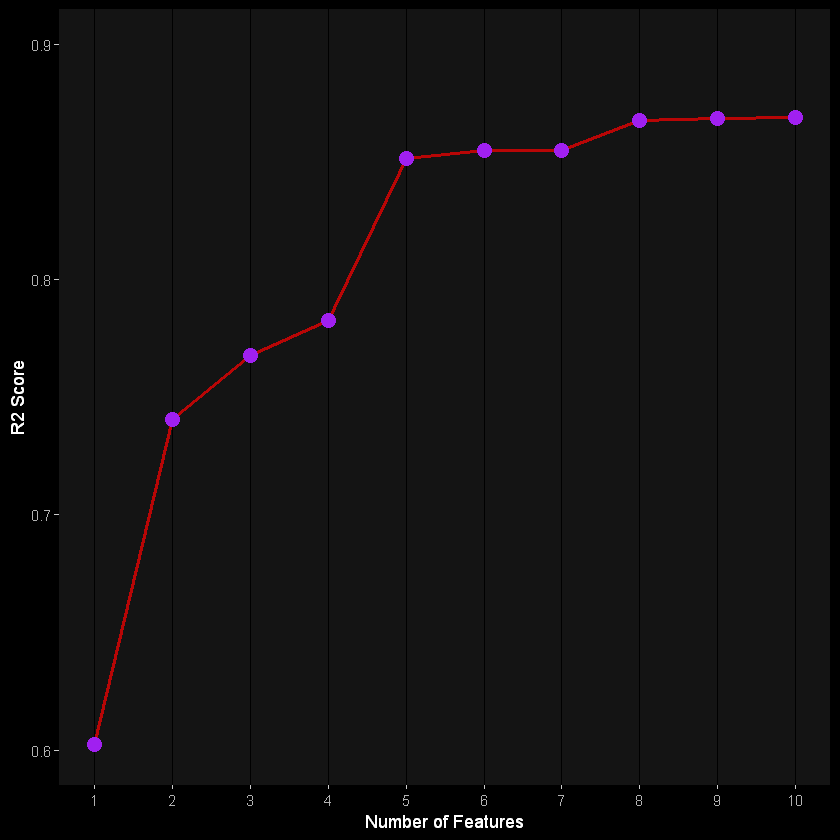

In [12]:
ggplot(data = df, aes(x = numberOfFeatures, y = r2Score)) +  
geom_line(size = 1,color = "red", alpha = 0.7)+
geom_point(size = 4,color = "purple") + 
xlab("Number of Features") +
ylab("R2 Score") +
scale_x_continuous(breaks = numberOfFeatures)+
scale_y_continuous(limits = c(0.6, 0.9)) +
dark_theme_grey() +
removeGridY()

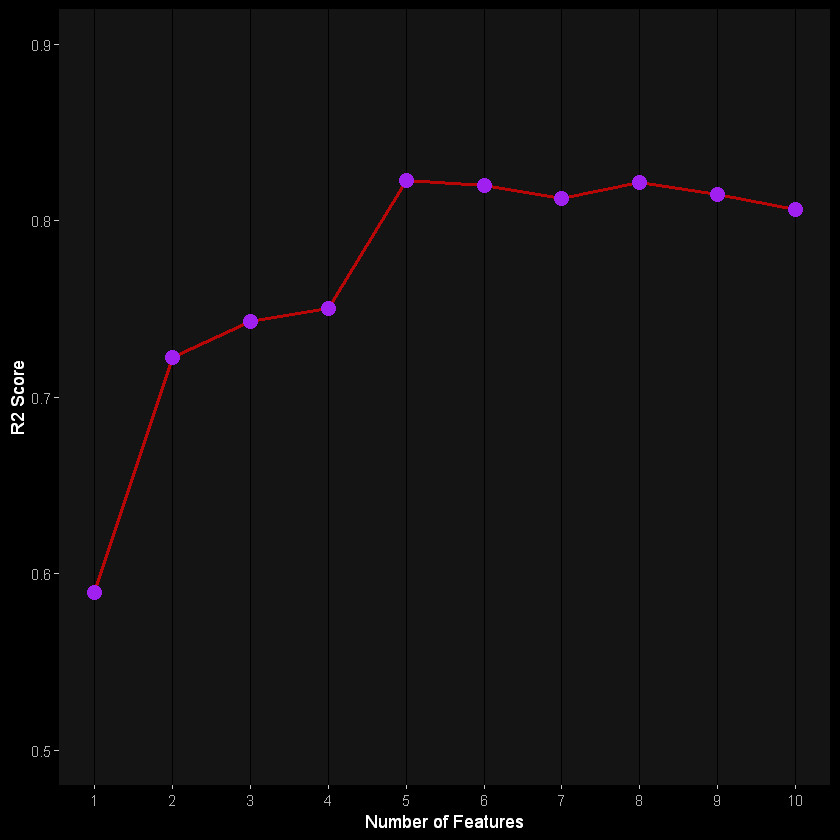

In [11]:
ggplot(data = df, aes(x = numberOfFeatures, y = adjR2Score)) +  
geom_line(size = 1,color = "red", alpha = 0.7)+
geom_point(size = 4,color = "purple") + 
xlab("Number of Features") +
ylab("R2 Score") +
scale_x_continuous(breaks = numberOfFeatures)+
scale_y_continuous(limits = c(0.5, 0.9)) +
dark_theme_grey() +
removeGridY()